```Searching a celebrity looks like me!```
=
> ## 목차
> ---
> ### 1. 실행 방법   
> ### 2. 목표 및 의의   
> ### 3. 이론 [go](#3-이론)
>   > 1 embedding이란?   
>   > 2 triplet loss   
>   > 3 face_recognition
> ### 4. 코드 분석 [go](#4-코드-분석)
>   > [0 코드 흐름](#0-코드-흐름)   
>   > [1 데이터 준비](#1-데이터-준비-및-전처리)    
>   > [2 모델 설계 및 실험](#2-모델-설계-및-실험)   
>   > [3 모델 평가](#3-모델-평가)   
> ### 5. 아쉬운 점 [go](#5-아쉬운-점)


# 1. 실행 방법
 1. 필요 라이브러리: matplotlib, face_recognition, numpy
 2. git clone https://github.com/SunCreation/aiffel.git 으로 repository를 가져온다.
 3. 원하는 (본인)사진을 aiffel/Working/AI/searching_one_like_me/test 폴더에 넣는다.
 4. aiffel/Working/AI/searching_one_like_me 폴더에서 searching_celebrity.py 파일을 실행한다. ```python3 searching_celebrity.py```
 5. aiffel 폴더의 위치를 입력한다.
# 2. 목표 및 의의
 1. 나와 닮은 사진 연예인을 찾을 수 있다.
 2. 원하는 사진과 닮은 연예인 사진을 찾는 프로그램을 만든다.(조건: 프로그램이 연예인 사진을 모두 들고 있으면 곤란하지 않을까..?)
 3. embedding에 대해서 이해한다.
 4. triplet loss손실함수에 대해 이해해본다.   
 5. embedding 벡터에 대해 직관할 수 있는 시각화를 시도해본다.
    
# 3. 이론
[목차](#searching-a-celebrity-looks-like-me)
## 1) embedding이란?
embedding은 원래 있던 공간과 다른 위상을 같는 공간으로 대상을 변형시키는 변환을 의미합니다. 먼저 수학적으로 갖는 의미가 이러한데, 특히 머신러닝에서 많이 사용되는 용어인 듯 해요.    
개인적으로 이해하기로는 특정 대상이 같는 정사영, projection과 그 의미가 일맥상통하는 부분이 있다고 생각했어요. 먼저 원래 대상과 다른 차원에서 대상을 본다는 점과 그 대상의 원하는 특성을 뽑아내서 본다는 부분이 그러합니다.    
![이미지](https://d3s0tskafalll9.cloudfront.net/media/original_images/E-11-3.jpg)    
사실 저번 [프로젝트(To make AI writer)](https://github.com/SunCreation/aiffel/tree/main/Working/AI/writer)에서도 언어를 embedding하여 사용하는 것이 아주 중요한 요소였습니다. 왜 embedding을 하는 것일까요?

먼저 오늘 할 닮은 사진 찾기에서 보면, 사진사이에 비교할 수 있는 값은 너무 많습니다. 얼굴만 뽑아서 보더라도, 얼굴의 색상, 크기, 형태, 눈코입 위치, 등등.. 하지만 사실 이런 값들을 바로 알 수만 있다면 아무 문제가 되지 않을 것입니다. 컴퓨터가 아는 것은 오직 픽셀의 위치에 대한 색상 수치 뿐! 이 숫자들이 정말 얼굴 사진이긴 한건지 의심스러운 가운데, 어떻게 비슷한 얼굴을 비교해낼 수 있을까요?   
그 해답은 바로 다음에 있습니다!

## 2) face_recognition   

![이미지](https://d3s0tskafalll9.cloudfront.net/media/original_images/E-11-4.png)   

위,아래 사진들은 Florian Schroff, Dmitry Kalenichenko, James Philbin의 논문 [FaceNet: A Unified Embedding for Face Recognition and Clustering](https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Schroff_FaceNet_A_Unified_2015_CVPR_paper.pdf)에 소개되고 있는 embedding 방식입니다.   

많이 간략하게 요약을 하자면, deeplearning을 이용하여 embedding벡터를 구한다는 내용입니다! 기본적인 개념은 embedding하여 나온 벡터를 embedding vertor라 할때, 이 벡터 값 사이의 거리가 가까울 수록 닮은 사진이라 판단하는 것입니다. 모델을 학습할 때는 실제로 닮은 사진과, 닮지 않은 사진에 대한 결과값을 기준으로 손실함수을 만들어 사용함으로, 우리가 원하는 결과를 얻을 수 있게됩니다.   
위 내용을 봐도, 논문도 그렇고 너무 어려워 보이네요. 어떻게 사용할 수 있을까요?

위 논문을 차근차근 읽어나가는 것도 추천드립니다. 하지만, 다음 명령어로 python에서 해당 기능을 사용할 수 있습니다.   

  [```pip install face_recognition```](https://github.com/ageitgey/face_recognition)   (누르시면 라이브러리 설명페이지로 넘어갑니다.)

위 라이브러리는 기본적으로 dlib기능을 사용하여, 사진에서 얼굴을 찾아내어 인식한 후에, 해당 사진을 적절한 정규화, 조직화를 거쳐 embedding까지 해줍니다.

## 3) triplet loss   

위와같이 임베딩을 통해 닮은 사진 혹은 원하는 특징을 추출하는 큰 작동 원리는 바로 triplet loss 라는 손실함수에 있습니다.    

![이미지](https://d3s0tskafalll9.cloudfront.net/media/images/E-11-5.max-800x600.png)   

기계학습에서 모델을 손실함수의 결과값이 최소값을 향해 이동하도록 학습을 진행하게 되는데, triplet loss는 학습시키는 대상과, 두개의 정답(라벨), 이렇게 총 3개의 데이터를 비교하여 정의합니다. 위 그림을 보시면 이해에 도움이 될것입니다.

학습값인 Anchor가 입력데이터로 들어오면, Anchor, Negative, Positive 세게의 embedding vector가 얻어지고, Anchor가 Negative와는 멀어질 수록, Positive와는 가까워 질 수록 loss값이 낮아질 수 있도록, 손실함수가 정의되는 것 입니다. 보다 자세한 내용은 위의 논문 링크를 눌러 확인하실 수 있습니다.

# 4. 코드 분석
[목차](#searching-a-celebrity-looks-like-me)
## 0) 코드 흐름
아래 코드는 searching.py의 코드 설명으로, 위 실행파일과 다릅니다.(사유: 사진용량 답이 없습니다.)
    
이번 프로젝트에서는 위에서 설명한 embedding 과 triplet loss를 이용하여 서로 닮은 사진을 가려내는 재미있는 일을 해보겠습니다.    
순서는 다음과 같습니다. 

 [1 데이터 준비](#1-데이터-준비-및-전처리)    
 먼저 충분한 연예인 사진자료와 이름이 필요합니다. 오늘은 직접 모델 학습은 진행하지 않고, 학습되있는 embedding vector model을 가져다 사용할 것입니다. 이를 사용해서 닮은 꼴 연예인을 찾을 수 있도록, 충분한 연예인 사진이 필요하겠습니다!

 [2 모델 설계 및 실험](#2-모델-설계-및-실험)   
 embedding vector model은 제공받아서 함수처럼 편리하게 사용할 수 있지만, 나머지 함수는 한번 저희가 만들어 보도록 하겠습니다. 이로서, 이러한 어플리케이션이 어떠한 방식으로 구동되는지 이해할 수 있겠군요:)   

 [3 모델 평가](#3-모델-평가) 
 실제로 얼굴을 어떻게 분류했는지, 어떻게 동작하는지 확인해보고, 정말 닮은 얼굴을 찾아주는지 확인해보도록 합니다. 이렇게 쉽게 닮은 얼굴을 찾는 인공지능을 설계할 수 있다니, 선배들의 위대함이 다시 한번 느껴집니다!!




---
[목차](#searching-a-celebrity-looks-like-me)
## 1) 데이터 준비 및 전처리
#### 이번 프로젝트에서 준비할 자료는 많은 연예인 사진과, 또 그 연예인 사진과 비교할 사진입니다. 또 연예인 사진은 사진 제목이 연예인 이름으로 라벨링이 잘 되어있어야, 잘 사용할 수 있습니다. 제가 준비한 자료가 얼마나 있는지 확인해 볼까요?ㅎㅎ


In [2]:
import os
import numpy as np
import face_recognition
import matplotlib.pyplot as plt
import matplotlib.image as img
print("It's nice")

It's nice


In [3]:
dir_path = os.getenv('HOME')+'/Working/AI/face_embedding/images'
test_dir_path = os.getenv('HOME')+'/Working/AI/face_embedding/test'
file_list = os.listdir(dir_path)
test_list = os.listdir(test_dir_path)

# print ("file_list: {}".format(file_list))

print(len(file_list))

2094


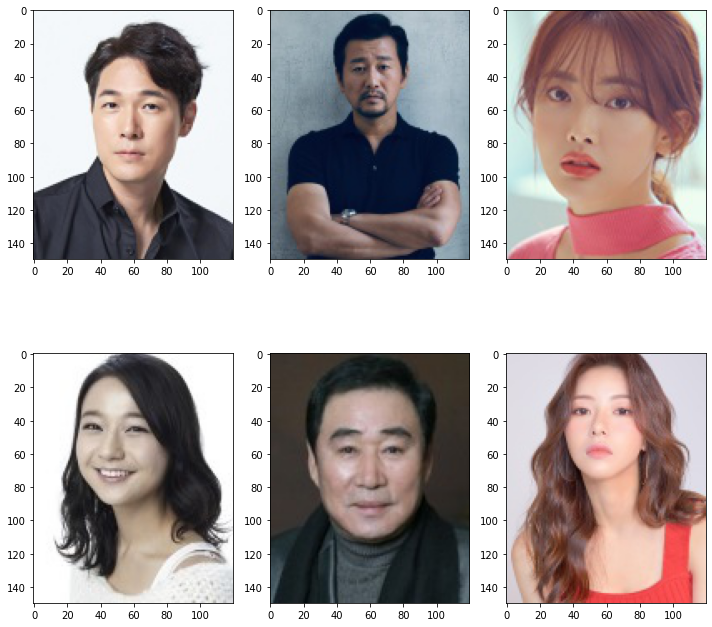

In [4]:
#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)
fig.tight_layout()
plt.show()

[(98, 758, 284, 572)]


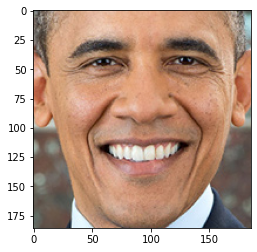

In [5]:
image_path = dir_path+ '/obama.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)

이번 프로젝트는 만들어진 임베딩벡터 추출함수로 원하는 기능을 구현해내는 내용이 많습니다. 때문에 함수가 많이 쓰여야 하고, 중요합니다!!

다음으로는 바로 그 embedding vector를 구해주는 함수입니다.

In [6]:
def get_cropped_face(image_file):
    # [[YOUR CODE]]
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    cropped_face =None
    if len(face_locations) != 0:
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]
    return cropped_face
file_list = os.listdir(dir_path)

# image_file = os.path.join(dir_path, '김영재.jpg')
# face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)
# plt.imshow(face)
# plt.show()
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

# '김영재.jpg', '곽민석.jpg', '한가림.jpg', '김꽃비.jpg', '박상조.jpg', '박하나.jpg', '류원정.jpg'

# embedding = get_face_embedding(face)  
# print(len(embedding))
# print(embedding)

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        filename= ".".join(file.split('.')[:-1]) # os.path.splitext(file)[0]
        image_file = os.path.join(dir_path, file)
        face=get_cropped_face(image_file)
        if face is None : continue
        
        try:
            embedding_dict[filename]=get_face_embedding(face)[0]
        except:
            pass

        
    return embedding_dict
# embedding_dict={}

다음으로는 경로를 받아서 경로 안의 모든 사진을 한번에 넣어주고, 이를 사람 이름과 그 얼굴의 embedding vector의 딕셔너리로 반환해주는 함수를 만들겠습니다... 복잡하네요. 위의 함수들로 이것이 조금 단순화 됩니다.

사실 이 사진들에서 오류가 나와서 너무 힘이 들었습니다. 오류가 발생하는 지점부터가 어려웠는데, 계속 찾다보니, embedding vector를 만들어주는 함수가 얼굴을 입력받아도 출력을 안주는 경우가 있다는 것을 알게되었습니다. 따라서 오류가 발생할 시 try, except문으로 넘어가도록 만들어주었습니다.

In [7]:
embedding_dict = get_face_embedding_dict(dir_path)

test_dict = get_face_embedding_dict(test_dir_path)
test_dict.keys()

dict_keys(['IMG_2135', 'itsme2', '조해창'])

In [8]:
who = [i for i,j in embedding_dict.items()]

# print ("비교대상들..!!: {}".format(who))



----
[목차](#searching-a-celebrity-looks-like-me)
## 2) 모델 설계 및 실험
#### 위에서 사용했던 내용들을 이제 저희가 원하는 닮은 얼굴 찾기를 위해 적용하여 함수를 만들겠습니다. 기본적인 개념은 얼굴 사진을 embedding vector로 바꾸어 준 후, embedding vector사이의 L2 distance를 비교해 거리가 가까운 벡터를 찾는 일입니다. 먼저 거리를 계산하는 함수부터 만들겠습니다. 

In [9]:
def get_distance(test, name):
    return np.linalg.norm(test_dict[test]-embedding_dict[name], ord=2)


In [10]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [11]:
def get_nearest_face(name, top=5):
    sort_key_func=get_sort_key_func(name)
    nearlist = [i for i, j in sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))[:top]]
    print("비슷한 연예인 순위 발표!!")
    n = 1
    for i in nearlist:
        #if n !=0:
        
        for x in file_list:
            if i in x:
                ax = plt.subplot(1, top, n)
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(get_cropped_face('images/'+x))
                
        
        print(str(n) + "위 :", i + ',', "- 얼굴 거리:",sort_key_func(i))
        n +=1
    plt.show()
    print(nearlist[0],"를(을) 가장 닮으셨군요?")
    plt.subplot(121)
    plt.title("it's me")
    for x in test_list:
        if name in x:
            plt.imshow(get_cropped_face('test/'+x))
        
    plt.subplot(122)
    a = nearlist[0]
    plt.title(a) # 아직 한글 안됨
    for x in file_list:
        if nearlist[0] in x:
            plt.imshow(get_cropped_face('images/'+x))
    plt.show()
    return nearlist

----
[목차](#searching-a-celebrity-looks-like-me)
## 3) 모델 평가
#### 어떻게 작동하는지 확인해보겠습니다! 또 정말 닮았는지도 확인해볼까요?

비슷한 연예인 순위 발표!!
1위 : 하정우, - 얼굴 거리: 0.413639618545323
2위 : 박해수, - 얼굴 거리: 0.43766004850032025
3위 : 김정현, - 얼굴 거리: 0.43809106008583076
4위 : 민지환, - 얼굴 거리: 0.44019898139197433
5위 : 윤세웅, - 얼굴 거리: 0.44171168462180804


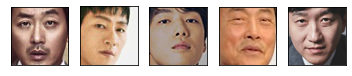

하정우 를(을) 가장 닮으셨군요?


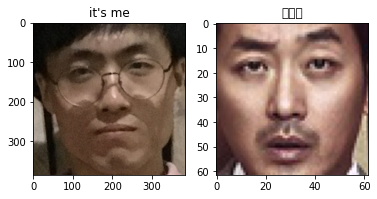

['하정우', '박해수', '김정현', '민지환', '윤세웅']

In [13]:
get_nearest_face('itsme2')


```
닮은 꼴 연예인 순위 발표!!
1위  : 박원상, - 얼굴 거리:  0.40489069421258506
2위  : 박지일, - 얼굴 거리:  0.4157318085194855
3위  : 이종혁, - 얼굴 거리:  0.43105342754771403
4위  : 백도빈, - 얼굴 거리:  0.4388600586663692
5위  : 하정우, - 얼굴 거리:  0.4460418737626919
6위  : 윤주상, - 얼굴 거리:  0.4462334120248691
7위  : 윤세웅, - 얼굴 거리:  0.455455605967715
8위  : 최종윤, - 얼굴 거리:  0.460045631672175
9위  : 박철민, - 얼굴 거리:  0.46207023889806076
10위 : 김민기, - 얼굴 거리:  0.4639429521615208
11위 : 임한별, - 얼굴 거리:  0.4695243868889826
12위 : 양택조, - 얼굴 거리:  0.4704170293181993
13위 : 차인표, - 얼굴 거리:  0.47098473156672643
14위 : 백년설, - 얼굴 거리:  0.47291298489487166
15위 : 이윤상, - 얼굴 거리:  0.47323621485487805
16위 : 전무송, - 얼굴 거리:  0.47403851201881625
17위 : 이승철, - 얼굴 거리:  0.4741976547517154
18위 : 해창, - 얼굴 거리:  0.47482230657532487
박원상을(를) 가장 닮았네요:)
```
![이미지](data/soldier.png)   
조금 다른 사진을 써봤더니, 같은 내 사진이지만, 순위가 뒤로 확 밀리는 현상도 있었어요. 표정의 차이가 필요 이상으로 학습되었다는 생각이 드네요.


---
# 5. 아쉬운 점

### 1. 먼저 시간안에 시각화를 만족스럽게 해주지 못해서 아쉬웠습니다.
### 하지만, 모델의 동작이 매우 자연스럽고 표정의 변화만으로도 거리의 차이가 생기는 점은 인상깊었습니다. 